#Import Dataset

In [163]:
# import the libraries

import numpy as np
import pandas as pd

In [164]:
# import the dataset

df = pd.read_csv("tyres_model.csv", sep = ",")
df

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure
0,17.990,26,1,0.16,0.01,-8.12,0,1,332.5,8,0,1,5.13,55.0,1,0
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,NaN,1,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,NaN,1,0
3,16.802,35,1,0.19,0.02,7.44,1,0,408.0,7,3,1,6.62,54.5,1,0
4,17.140,23,2,0.39,0.01,30.52,0,1,308.0,2,2,0,6.15,76.3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,17.818,29,2,0.39,0.01,7.28,1,1,287.5,10,1,1,5.68,NaN,1,1
2996,17.076,30,1,0.22,0.00,-1.44,1,1,152.5,6,1,0,5.81,NaN,1,1
2997,16.170,33,1,0.39,0.01,-3.44,1,0,235.0,8,3,1,5.57,NaN,0,0
2998,18.872,37,0,0.03,0.00,-0.76,4,0,290.0,11,0,0,5.89,60.3,0,0


# Data Preparation & Data Exploration

In [165]:
# check which are the columns with NAs

df.isna().any()

vulc               False
perc_nat_rubber    False
wiring_strength    False
weather            False
perc_imp           False
temperature        False
tread_type         False
tyre_season        False
elevation          False
month              False
tread_depth        False
tyre_quality       False
perc_exp_comp      False
diameter            True
add_layers         False
failure            False
dtype: bool

In [166]:
# "diameter" is the only variable with NAs

df['diameter'].isna()

0       False
1        True
2        True
3       False
4       False
        ...  
2995     True
2996     True
2997     True
2998    False
2999    False
Name: diameter, Length: 3000, dtype: bool

In [167]:
# drop the column with NA values
# we decided to drop it because almost the 70% of the observations are NAs
df_drop=df.dropna(axis=1)
df_drop.isna().any()

vulc               False
perc_nat_rubber    False
wiring_strength    False
weather            False
perc_imp           False
temperature        False
tread_type         False
tyre_season        False
elevation          False
month              False
tread_depth        False
tyre_quality       False
perc_exp_comp      False
add_layers         False
failure            False
dtype: bool

In [168]:
# summmary of the data

df = df_drop
df.describe()

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,add_layers,failure
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.00000,3000.000000
mean,18.184712,31.249667,0.631333,0.282987,0.014550,-2.375360,1.618000,0.547667,376.184000,5.779667,1.212000,0.309667,5.79151,0.92200,0.336000
std,1.587193,4.933300,0.546673,0.183252,0.014262,5.672184,1.487553,0.497806,151.149861,3.318954,1.153617,0.462433,0.41032,0.36418,0.472418
min,12.312000,18.000000,0.000000,0.030000,0.000000,-19.280000,0.000000,0.000000,41.500000,0.000000,0.000000,0.000000,4.54000,0.00000,0.000000
25%,17.241500,28.000000,0.000000,0.160000,0.010000,-6.960000,0.000000,0.000000,263.500000,3.000000,0.000000,0.000000,5.48000,1.00000,0.000000
50%,17.834000,31.000000,1.000000,0.210000,0.010000,-2.080000,1.000000,1.000000,342.000000,6.000000,1.000000,0.000000,5.80000,1.00000,0.000000
75%,18.934000,35.000000,1.000000,0.370000,0.020000,0.080000,3.000000,1.000000,471.625000,8.000000,2.000000,1.000000,6.08000,1.00000,1.000000
max,29.932000,46.000000,2.000000,0.930000,0.050000,37.000000,4.000000,1.000000,939.500000,11.000000,3.000000,1.000000,7.21000,2.00000,1.000000


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Text major ticklabel objects>)

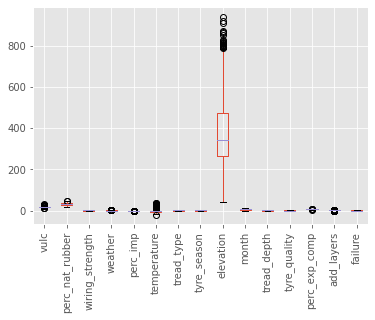

In [169]:
# boxplot
import matplotlib.pyplot as plt
%matplotlib inline
df.boxplot()
plt.xticks(rotation=90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05ccef0850>,
      dtype=object)

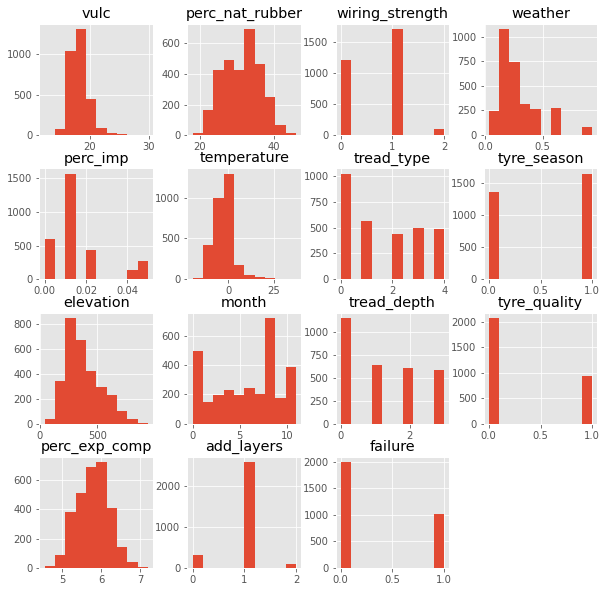

In [170]:
df.hist(figsize=(10, 10))

Data distribution and standardization

In [171]:
# normality test on numerical variables

from scipy import stats

# vulc - Numerical Vulcanization level
# perc_nat_rubber - Numerical % natural rubber
# weather - Numerical Weather condition index: 1: best, 0: worst
# perc_imp - Numerical % impurities
# temperature - Numerical Temperature in °C
# elevation - Numerical Elevation in meters above sea level
# perc_exp_comp - Numerical % experimental compound

print(stats.shapiro(df.vulc))
print(stats.shapiro(df.perc_nat_rubber))
print(stats.shapiro(df.weather))
print(stats.shapiro(df.perc_imp))
print(stats.shapiro(df.temperature))
print(stats.shapiro(df.elevation))
print(stats.shapiro(df.perc_exp_comp))

# all the variables aren't normally distributed, so we can't eliminate possibile outliers using 3*sigma

ShapiroResult(statistic=0.9071341156959534, pvalue=2.0922633228002768e-39)
ShapiroResult(statistic=0.9903560280799866, pvalue=2.287408543827363e-13)
ShapiroResult(statistic=0.8345675468444824, pvalue=0.0)
ShapiroResult(statistic=0.7377035617828369, pvalue=0.0)
ShapiroResult(statistic=0.8973006010055542, pvalue=6.636129137503036e-41)
ShapiroResult(statistic=0.9524024128913879, pvalue=3.421289661684093e-30)
ShapiroResult(statistic=0.9964845776557922, pvalue=1.8005791844188934e-06)


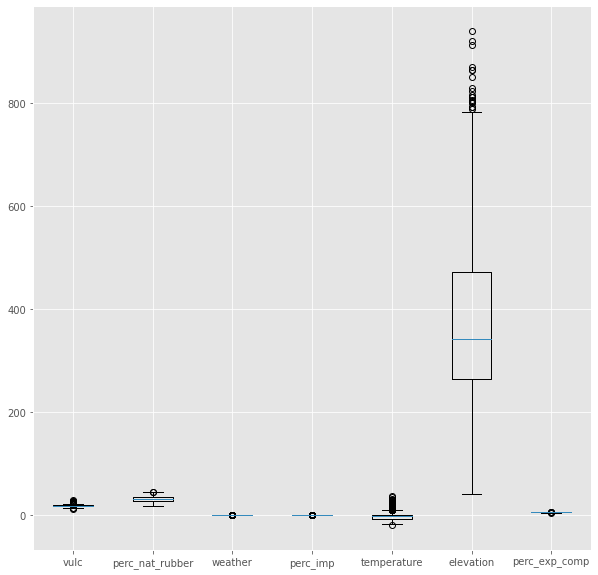

In [172]:
## Lets take a look at the boxplots of all the numerical attributes

import matplotlib.pyplot as plt

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the boxplots
ax.boxplot([df.vulc, df.perc_nat_rubber, df.weather, df.perc_imp,df.temperature, df.elevation, df.perc_exp_comp], 
           labels=['vulc', 'perc_nat_rubber', 'weather','perc_imp', 'temperature', 'elevation', 'perc_exp_comp'])

# Show the plot
plt.show()

In [173]:
# To manage better the data, we divide the dataset in 2 different ones, depending on the variable's category

df_numerical = df[['vulc','perc_nat_rubber','weather', 'perc_imp', 'temperature', 'elevation', 'perc_exp_comp']]
df_categorical = df[['tread_type', 'tyre_season', 'month', 'tread_depth', 'wiring_strength', 'tyre_quality', 'add_layers', 'failure']]

df_numerical.shape
df_categorical.shape

(3000, 8)

In [174]:
# Not having notmal distributed variables and having different order of magnitude among the attributes, we'll use MinMaxScaler to standardize numerical data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy=False,feature_range=(-1, 1))
scaler.fit(df_numerical) 
scaled_data = scaler.transform(df_numerical)
scaled_df = pd.DataFrame(scaled_data)
scaled_df.columns = df_numerical.columns
df_categorical_new = df_categorical


(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text major ticklabel objects>)

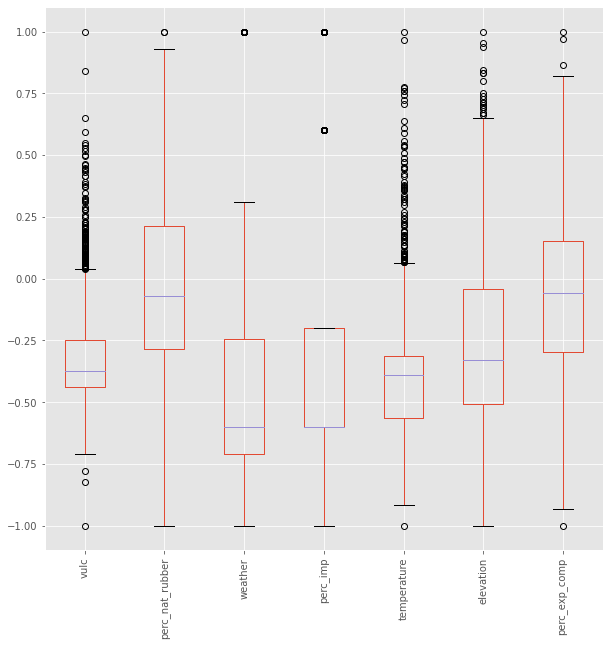

In [175]:
scaled_df.boxplot(figsize=(10,10))
plt.xticks(rotation=90)

In [176]:
df = pd.concat([scaled_df, df_categorical_new], axis=1)
df

,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp,tread_type,tyre_season,month,tread_depth,wiring_strength,tyre_quality,add_layers,failure
0,-0.355505,-0.428571,-0.711111,-0.6,-0.603412,-0.351893,-0.558052,0,1,8,0,1,1,1,0
1,-0.047446,0.285714,-0.400000,-0.6,-0.475480,-0.361915,0.205993,2,0,11,1,1,0,1,0
2,-0.223156,0.142857,-0.400000,-0.6,-0.353234,-0.542316,0.363296,0,0,0,1,1,0,1,0
3,-0.490352,0.214286,-0.644444,-0.2,-0.050462,-0.183742,0.558052,1,0,7,3,1,1,1,0
4,-0.451986,-0.642857,-0.200000,-0.6,0.769723,-0.406459,0.205993,0,1,2,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-0.375028,-0.214286,-0.200000,-0.6,-0.056148,-0.452116,-0.146067,1,1,10,1,2,1,1,1
2996,-0.459251,-0.142857,-0.577778,-1.0,-0.366027,-0.752784,-0.048689,1,1,6,1,1,0,1,1
2997,-0.562089,0.071429,-0.200000,-0.6,-0.437100,-0.569042,-0.228464,1,0,8,3,1,1,0,0
2998,-0.255392,0.357143,-1.000000,-1.0,-0.341862,-0.446548,0.011236,4,0,11,0,0,0,0,0


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Text major ticklabel objects>)

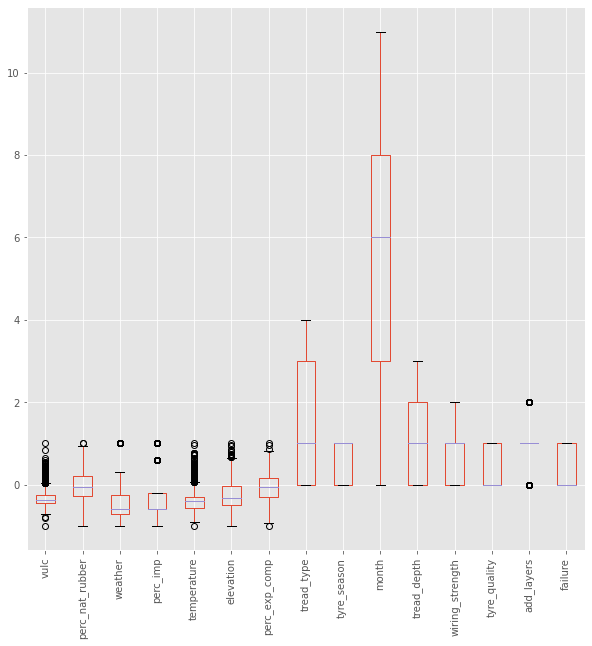

In [177]:
df.boxplot(figsize=(10,10))
plt.xticks(rotation=90)

Outliers (numerical data)

In [178]:

# %matplotlib inline
# import seaborn as sns

# sns.boxplot(x=df['vulc'])


In [179]:
# df.hist(column="vulc", bins='auto')

In [180]:
# Based on Chebyshev’s theorem, a proportion at least equal to (1 − 1/γ 2) of the values will
# fall within the interval (μ ± γ*σ ), namely at no more than γ standard deviations from the sample mean.

# for example γ = 3, the theorem guarantees that at least (1 − 1/3^2) =
# 8/9 ≈ 89% of the values will fall within the interval (μ ± 3σ )

In [181]:
# keep only the ones that are within +x to -x standard deviations in the column
# x = 3

# numericals = df[['vulc','perc_nat_rubber','weather', 'perc_imp', 'temperature', 'elevation', 'perc_exp_comp']]

# for col in numericals:
#   column = df[col]
#   mean = column.mean()
#   sd = column.std()
#   df[col] = column[ np.abs(column - mean) <= 3 * sd ]

In [182]:
# df


In [183]:
# # we drop the observations containing NaN that are considered outliers
# df = df.dropna(axis=0)
# df.isna().any()

In [184]:
# df.shape #we have dropped `170 observations (outliers)

In [185]:
# df.boxplot(figsize=(10,10))
# plt.xticks(rotation=90)

Assign Categorical type

In [186]:
for col in df_categorical:
  column = df[col]
  df[col] = column.astype('category')



In [187]:
df.dtypes

vulc                float64
perc_nat_rubber     float64
weather             float64
perc_imp            float64
temperature         float64
elevation           float64
perc_exp_comp       float64
tread_type         category
tyre_season        category
month              category
tread_depth        category
wiring_strength    category
tyre_quality       category
add_layers         category
failure            category
dtype: object

Gini Index

In [188]:
# now we want to compute the gini index of every categorical variable
# to understand if we want to drop any. A low Gini means that the categorical variable
# has low heterogenity, meaning that a class of the category encodes the most observations
# Thus, the variable may not be significant in the explanation of the target

from collections import Counter

def gini_index(df, attribute):
  # Calculate the frequency of each unique value in the attribute
  freq = Counter(df[attribute])
  # Initialize the Gini index to 0
  gini = 0
  # Iterate over the frequency of each unique value
  for value in freq.values():
    # Calculate the probability of each unique value
    prob = value / sum(freq.values())
    # Add the probability of each unique value squared to the Gini index
    gini += prob ** 2
  # Subtract the sum of the probabilities squared from 1
  gini = 1 - gini
  return gini

In [189]:
# lets calulate the gini index of every categorical variable
# We've got the following categorical variables: tread_type, tyre_season, month, tread_depth, wiring_strength, tyre_quality, add_layers

print(gini_index(df, 'tread_type'))
print(gini_index(df, 'tyre_season')) ## 0.49 Pretty low
print(gini_index(df, 'month'))
print(gini_index(df, 'tread_depth'))
print(gini_index(df, 'wiring_strength')) ## 0.52 Pretty low
print(gini_index(df, 'tyre_quality')) ## 0.43 Pretty low
print(gini_index(df, 'add_layers')) ## 0.25 Low Gini Index. Maybe we can drop it

0.7744771111111111
0.49545577777777783
0.8881906666666667
0.7255353333333333
0.517973111111111
0.42754644444444445
0.24544866666666676


In [190]:
#df = df.drop('add_layers', axis=1)

# a low gini index indicate a low incidence from the variable on the target. We tried our best perfomant model
# on the dataset with this variable droped, but the results were slightly worse. for this reason we decided to keep it.

Imbalanced Data

failure
0    1992
1    1008
dtype: int64


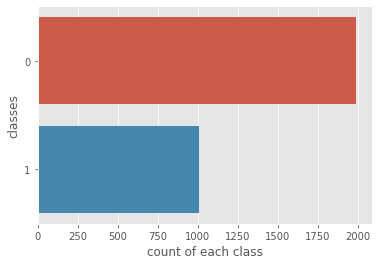

In [191]:
# managing imbalanced data
# Print class freq. through pandas 
print(df.groupby('failure').size())

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=df['failure'] ,data=df)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [192]:
from sklearn.metrics import accuracy_score

y=df['failure']
y_pred=np.zeros(len(y))

accuracy_score(y, y_pred)

# We'll do our analysis on Downsapled and Oversampled datasets, and we'll compare the performance of our model on both

0.664

In [193]:
# Creation of Downsampled dataset

from sklearn.utils import resample
#Down-sample Majority Class
#1) Separate majority and minority classes
df_majority = df[df.failure==0] #"target" is the name of the target column, change it accordingly to your dataset
df_minority = df[df.failure==1] #"target" is the name of the target column, change it accordingly to your dataset
 
#2) Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,
                                   n_samples=1008,     # number of samples into the minority class (change it accordingly to your dataset)
                                   random_state=123)  # reproducible results
 
#3) Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
#4) Display new class counts
df_downsampled.failure.value_counts() #"target" is the name of the target column, change it accordingly to your dataset

0    1008
1    1008
Name: failure, dtype: int64

In [194]:
from sklearn.utils import resample

#Over-sample Minority Class
#1) Separate majority and minority classes
df_majority = df[df.failure==0] #"target" is the name of the target column, change it accordingly to your dataset
df_minority = df[df.failure==1] #"target" is the name of the target column, change it accordingly to your dataset
 
#2) Oversample minority class
df_minority_oversampled = resample(df_minority, 
                                   replace=True,
                                   n_samples=1992,     # number of samples into the minority class (change it accordingly to your dataset)
                                   random_state=123)  # reproducible results
 
#3) Combine oversampled minority class with majority class
df_oversampled = pd.concat([df_minority_oversampled, df_majority])
 
#4) Display new class counts
df_oversampled.failure.value_counts() #"target" is the name of the target column, change it accordingly to your dataset

0    1992
1    1992
Name: failure, dtype: int64

Separate Train/Test sets

In [195]:
#Separate X and y (explanatory variables and target variable)
X = df.iloc[:,:-1]
y = df.iloc[:,-1] #[-1]]

X_oversampled = df_oversampled.iloc[:,:-1]
y_oversampled = df_oversampled.iloc[:,-1] #[-1]]

X_downsampled = df_downsampled.iloc[:,:-1]
y_downsampled = df_downsampled.iloc[:,-1] #[-1]]


#X.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: failure, dtype: category
Categories (2, int64): [0, 1]

In [196]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y, #we use the stratify to force that the proportion of 0 and 1 in the test and train is the same
                                                    random_state= 123
                                                   ) #fix random seed for replicability across different devices. useful for class

#SPLIT DATA INTO TRAIN AND TEST SET OF OVERSAMPLED
X_oversampled_train, X_oversampled_test, y_oversampled_train, y_oversampled_test = train_test_split(X_oversampled, y_oversampled, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y_oversampled, #we use the stratify to force that the proportion of 0 and 1 in the test and train is the same
                                                    random_state= 123
                                                   ) #fix random seed for replicability across different devices. useful for class

#SPLIT DATA INTO TRAIN AND TEST SET OF DOWNSAMPLED
X_downsampled_train, X_downsampled_test, y_downsampled_train, y_downsampled_test = train_test_split(X_downsampled, y_downsampled, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y_downsampled, #we use the stratify to force that the proportion of 0 and 1 in the test and train is the same
                                                    random_state= 123
                                                   ) #fix random seed for replicability across different devices. useful for class




print(X_train.shape,X_test.shape)
print(X_oversampled_train.shape,X_oversampled_test.shape)
print(X_downsampled_train.shape,X_downsampled_test.shape)

(2100, 14) (900, 14)
(2788, 14) (1196, 14)
(1411, 14) (605, 14)


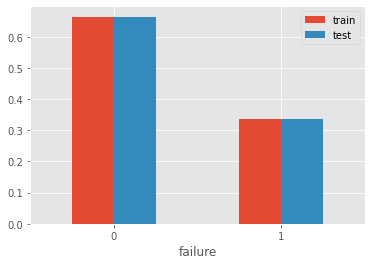

In [197]:
y_train_dist=y_train.groupby(y_train.iloc[:]).size()/y_train.size
y_test_dist=y_test.groupby(y_test.iloc[:]).size()/y_test.size

train_test_dist = pd.DataFrame({'train': y_train_dist, 'test': y_test_dist})
ax = train_test_dist.plot.bar(rot=0) # rotation of the labels

# stratify command in split function worked well

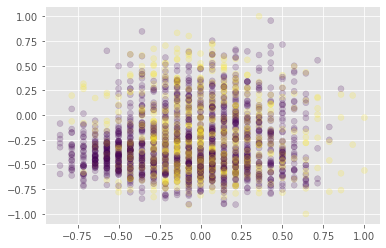

In [198]:
import matplotlib.pyplot as plt

x1 = X_train.iloc[:,1]
x2 = X_train.iloc[:,5]

plt.scatter(x1, x2,alpha=0.2,c=y_train )
plt.show()

# K-Nearest Neighbor


In [245]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#Create KNN Classifier
knn40 = KNeighborsClassifier(n_neighbors=40)

#Train the model using the training sets
knn40.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn40.predict(X_test)

In [246]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

[[551  47]
 [213  89]]


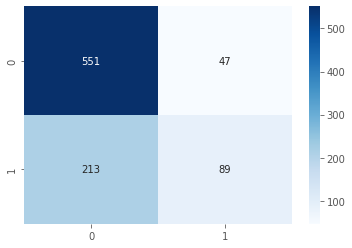

In [247]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format


# rows: true values
# column: predicted
# e.g. [0,1] false positives (9)

In [248]:
#EVALUATE OUR PREDICTION
from sklearn import metrics

print('***RESULTS ON TEST SET***')
print("F1_score: ",metrics.f1_score(y_test, y_pred))
print("Accuracy",metrics.accuracy_score(y_test, y_pred))
print("Recall",metrics.recall_score(y_test, y_pred))

***RESULTS ON TEST SET***
F1_score:  0.406392694063927
Accuracy 0.7111111111111111
Recall 0.2947019867549669


In [249]:
from sklearn.model_selection import GridSearchCV

#Create KNN Classifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,40)}

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=90, n_jobs=-1)
gs_oversampled = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1)
gs_downsampled = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1)

In [250]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train, y_train)
gs_oversampled = gs_oversampled.fit(X_oversampled_train, y_oversampled_train)
gs_downsampled = gs_downsampled.fit(X_downsampled_train, y_downsampled_train)

Fitting 3 folds for each of 39 candidates, totalling 117 fits
Fitting 3 folds for each of 39 candidates, totalling 117 fits
Fitting 3 folds for each of 39 candidates, totalling 117 fits


In [251]:
#summarize the results of your GRIDSEARCH
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))

means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean %f Std (%f) with: %r" % (mean, stdev, param))

## the optimal f1 score is with 5 neighbor

Best score: 0.495786 using {'n_neighbors': 5}
Mean 0.492825 Std (0.012049) with: {'n_neighbors': 1}
Mean 0.363834 Std (0.043401) with: {'n_neighbors': 2}
Mean 0.494415 Std (0.018601) with: {'n_neighbors': 3}
Mean 0.408339 Std (0.005942) with: {'n_neighbors': 4}
Mean 0.495786 Std (0.004586) with: {'n_neighbors': 5}
Mean 0.440073 Std (0.022214) with: {'n_neighbors': 6}
Mean 0.482886 Std (0.018108) with: {'n_neighbors': 7}
Mean 0.441421 Std (0.023844) with: {'n_neighbors': 8}
Mean 0.492866 Std (0.017540) with: {'n_neighbors': 9}
Mean 0.445330 Std (0.037659) with: {'n_neighbors': 10}
Mean 0.488579 Std (0.027628) with: {'n_neighbors': 11}
Mean 0.439039 Std (0.034497) with: {'n_neighbors': 12}
Mean 0.481363 Std (0.038144) with: {'n_neighbors': 13}
Mean 0.440149 Std (0.031367) with: {'n_neighbors': 14}
Mean 0.460678 Std (0.037944) with: {'n_neighbors': 15}
Mean 0.430486 Std (0.023925) with: {'n_neighbors': 16}
Mean 0.472789 Std (0.041243) with: {'n_neighbors': 17}
Mean 0.440317 Std (0.032438)

In [252]:
# We test the best models on the original test set

# Model trained on original test set
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

y_pred_train = best_model.predict(X_train)

# Model trained on oversampled test set
best_model_oversampled = gs_oversampled.best_estimator_
y_pred_oversampled = best_model_oversampled.predict(X_test)

y_pred_oversampled_train = best_model_oversampled.predict(X_train)

# Model trained on downsampled test set
best_model_downsampled = gs_downsampled.best_estimator_
y_pred_downsampled = best_model_downsampled.predict(X_test)

y_pred_downsampled_train = best_model_downsampled.predict(X_train)



In [253]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn import metrics

print('***RESULTS ORIGINAL MODEL***')
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))
print(" ")
print(" ")

print('***RESULTS OVERSAMPLED MODEL***')
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_oversampled_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred_oversampled))
print(" ")
print(" ")

print('***RESULTS DOWNSAMPLED MODEL***')
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_downsampled_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred_downsampled))

#The best F score on the test set is given by the oversampled model

***RESULTS ORIGINAL MODEL***
***RESULTS ON TRAIN SET***
f1_score:  0.6521739130434783
--
***RESULTS ON TEST SET***
f1_score:  0.4328358208955224
 
 
***RESULTS OVERSAMPLED MODEL***
***RESULTS ON TRAIN SET***
f1_score:  0.9303030303030303
--
***RESULTS ON TEST SET***
f1_score:  0.7133058984910837
 
 
***RESULTS DOWNSAMPLED MODEL***
***RESULTS ON TRAIN SET***
f1_score:  0.6143931256713212
--
***RESULTS ON TEST SET***
f1_score:  0.5882352941176471


# Classification Tree

In [43]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   vulc             3000 non-null   float64 
 1   perc_nat_rubber  3000 non-null   float64 
 2   weather          3000 non-null   float64 
 3   perc_imp         3000 non-null   float64 
 4   temperature      3000 non-null   float64 
 5   elevation        3000 non-null   float64 
 6   perc_exp_comp    3000 non-null   float64 
 7   tread_type       3000 non-null   category
 8   tyre_season      3000 non-null   category
 9   month            3000 non-null   category
 10  tread_depth      3000 non-null   category
 11  wiring_strength  3000 non-null   category
 12  tyre_quality     3000 non-null   category
 13  add_layers       3000 non-null   category
 14  failure          3000 non-null   category
dtypes: category(8), float64(7)
memory usage: 189.0 KB


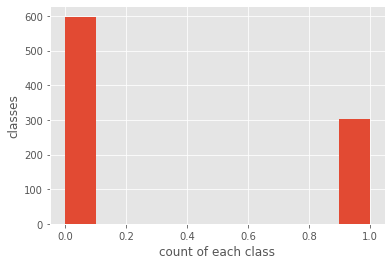

In [44]:
plt.hist(y_test)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [45]:
# We train the decision tree on the three datasets, and test the model performances on the test set of the original 
# dataset for all of them

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=2)
model_oversampled = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=2)
model_downsampled = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=2)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

model_oversampled.fit(X_oversampled_train, y_oversampled_train)
y_oversampled_pred = model.predict(X_test)

model_downsampled.fit(X_downsampled_train, y_downsampled_train)
y_downsampled_pred = model.predict(X_test)


# criterion : "gini", "entropy"
# max_depth : The maximum depth of the tree.
# min_samples_split : The minimum number of samples required to split an internal node:
# min_samples_leaf : The minimum number of samples required to be at a leaf node. 

In [46]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_test, y_oversampled_pred))
print(confusion_matrix(y_test, y_downsampled_pred))


[[479 119]
 [145 157]]
[[479 119]
 [145 157]]
[[479 119]
 [145 157]]


In [47]:
#EVALUATE OUR PREDICTION
from sklearn import metrics

print('***RESULTS ON TEST SET***')
print("F1_score: ",metrics.f1_score(y_test, y_pred))
print("Accuracy",metrics.accuracy_score(y_test, y_pred))
print("Recall",metrics.recall_score(y_test, y_pred))

print('***RESULTS ON TEST SET OVERSAMPLED***')
print("F1_score: ",metrics.f1_score(y_test, y_oversampled_pred))
print("Accuracy",metrics.accuracy_score(y_test, y_oversampled_pred))
print("Recall",metrics.recall_score(y_test, y_oversampled_pred))

print('***RESULTS ON TEST SET DOWNSAMPLED***')
print("F1_score: ",metrics.f1_score(y_test, y_downsampled_pred))
print("Accuracy",metrics.accuracy_score(y_test, y_downsampled_pred))
print("Recall",metrics.recall_score(y_test, y_downsampled_pred))

#with the selected hyperparameters we obtain the exact same results from the three trained models

***RESULTS ON TEST SET***
F1_score:  0.5432525951557093
Accuracy 0.7066666666666667
Recall 0.5198675496688742
***RESULTS ON TEST SET OVERSAMPLED***
F1_score:  0.5432525951557093
Accuracy 0.7066666666666667
Recall 0.5198675496688742
***RESULTS ON TEST SET DOWNSAMPLED***
F1_score:  0.5432525951557093
Accuracy 0.7066666666666667
Recall 0.5198675496688742


Hyperparameter optimization for our decision tree

In [48]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.tree import DecisionTreeClassifier
import numpy as np

classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [20, 50, 100, 200, 500, 1000],
              'min_samples_split': [5,10, 20],
              'min_samples_leaf': [2,4, 8]}

In [49]:
#DEFINE YOUR GRIDSEARCH 
'''
GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)
If refit=True the model is retrained on the whole training set with the best found params
'''
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1)
gs_oversampled = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1)
gs_downsampled = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1)



In [50]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train, y_train)
gs_oversampled = gs_oversampled.fit(X_oversampled_train, y_oversampled_train)
gs_downsampled = gs_downsampled.fit(X_downsampled_train, y_downsampled_train)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [51]:
#summarize the results of your GRIDSEARCH only on the original dataset. The same can be done with the other two, but we omit the code cell
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

## max depth in 100 when considering as possible parameters 5, 10, 20, 50, 100, 110

***GRIDSEARCH RESULTS***
Best score: 0.588839 using {'criterion': 'entropy', 'max_depth': 500, 'min_samples_leaf': 4, 'min_samples_split': 20}
0.522599 (0.004124) with: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.530528 (0.012680) with: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.580411 (0.017896) with: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 20}
0.539612 (0.019379) with: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5}
0.530299 (0.012360) with: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.580143 (0.010311) with: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 20}
0.547181 (0.013039) with: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 8, 'min_samples_split': 5}
0.550003 (0.012695) with: {'criterion': 'entropy

In [52]:
# We test the best models on the original test set

# Model trained on original test set
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

y_pred_train = best_model.predict(X_train)

# Model trained on oversampled test set
best_model_oversampled = gs_oversampled.best_estimator_
y_pred_oversampled = best_model_oversampled.predict(X_test)

y_pred_oversampled_train = best_model_oversampled.predict(X_train)

# Model trained on downsampled test set
best_model_downsampled = gs_downsampled.best_estimator_
y_pred_downsampled = best_model_downsampled.predict(X_test)

y_pred_downsampled_train = best_model_downsampled.predict(X_train)




In [53]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn import metrics

print('***RESULTS ORIGINAL MODEL***')
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))
print(" ")
print(" ")

print('***RESULTS OVERSAMPLED MODEL***')
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_oversampled_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred_oversampled))
print(" ")
print(" ")

print('***RESULTS DOWNSAMPLED MODEL***')
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_downsampled_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred_downsampled))

#The best F score on the test set is given by the oversampled model

***RESULTS ORIGINAL MODEL***
***RESULTS ON TRAIN SET***
f1_score:  0.7862873814733771
--
***RESULTS ON TEST SET***
f1_score:  0.5567010309278351
 
 
***RESULTS OVERSAMPLED MODEL***
***RESULTS ON TRAIN SET***
f1_score:  0.8696969696969696
--
***RESULTS ON TEST SET***
f1_score:  0.6666666666666666
 
 
***RESULTS DOWNSAMPLED MODEL***
***RESULTS ON TRAIN SET***
f1_score:  0.7234600262123199
--
***RESULTS ON TEST SET***
f1_score:  0.6555555555555554


In [54]:
#PRINT SOME FURTHER METRICS
from sklearn.metrics import classification_report

print('***RESULTS ORIGINAL MODEL***')
print(classification_report(y_test, y_pred))
print(" ")
print(" ")

print('***RESULTS OVERSAMPLED MODEL***')
print(classification_report(y_test, y_pred_oversampled))
print(" ")
print(" ")

print('***RESULTS DOWNSAMPLED MODEL***')
print(classification_report(y_test, y_pred_downsampled))
print(" ")
print(" ")

***RESULTS ORIGINAL MODEL***
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       598
           1       0.58      0.54      0.56       302

    accuracy                           0.71       900
   macro avg       0.68      0.67      0.67       900
weighted avg       0.71      0.71      0.71       900

 
 
***RESULTS OVERSAMPLED MODEL***
              precision    recall  f1-score   support

           0       0.86      0.74      0.80       598
           1       0.60      0.75      0.67       302

    accuracy                           0.75       900
   macro avg       0.73      0.75      0.73       900
weighted avg       0.77      0.75      0.75       900

 
 
***RESULTS DOWNSAMPLED MODEL***
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       598
           1       0.56      0.78      0.66       302

    accuracy                           0.72       900
   macro avg       0.71    

***ORIGINAL MODEL***


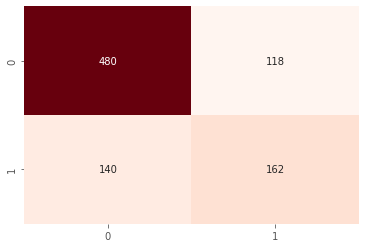

In [55]:
# Plot confusion matrix
print('***ORIGINAL MODEL***')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

#annot=True to annotate cells fmt: format

***OVERSAMPLED MODEL***


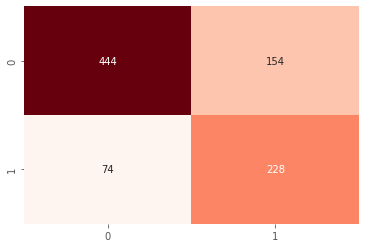

In [56]:
print('***OVERSAMPLED MODEL***')
sns.heatmap(confusion_matrix(y_test, y_pred_oversampled), annot=True, fmt='d', cmap="Reds", cbar=False);

***DOWNSAMPLED MODEL***


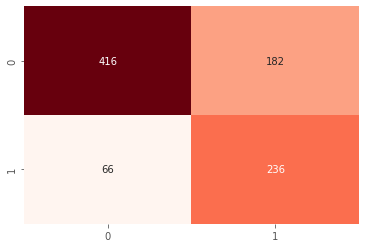

In [57]:
print('***DOWNSAMPLED MODEL***')
sns.heatmap(confusion_matrix(y_test, y_pred_downsampled), annot=True, fmt='d', cmap="Reds", cbar=False);

# Random Forest

In [220]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

classifier= RandomForestClassifier()
parameters = {'n_estimators' : [50, 100, 200],
    'criterion' : ['entropy', 'gini'],
             'max_depth' : [3,4,8,16,20], 
             'min_samples_split' : [5,10,20],
              'min_samples_leaf' : [4,5,10]
             }



gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)
gs_oversampled = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)
gs_downsampled = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)

In [221]:
gs.fit(X_train,y_train)
gs_oversampled.fit(X_oversampled_train,y_oversampled_train)
gs_downsampled.fit(X_downsampled_train,y_downsampled_train)


Fitting 3 folds for each of 270 candidates, totalling 810 fits
Fitting 3 folds for each of 270 candidates, totalling 810 fits
Fitting 3 folds for each of 270 candidates, totalling 810 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 8, 16, 20],
                         'min_samples_leaf': [4, 5, 10],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=10)

In [222]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS FOR ORIGINAL MODEL***')

print("Best score: %f using %s" % (gs_oversampled.best_score_, gs_oversampled.best_params_))
means = gs_oversampled.cv_results_['mean_test_score']
stds = gs_oversampled.cv_results_['std_test_score']
params = gs_oversampled.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS FOR ORIGINAL MODEL***
Best score: 0.809292 using {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
0.744757 (0.010201) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
0.750086 (0.008163) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
0.748491 (0.009077) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
0.749714 (0.010113) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
0.746352 (0.007539) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
0.749860 (0.008853) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
0.742030

In [223]:
#TEST ON YOUR TEST SET 

# Original model
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

y_pred_train = best_model.predict(X_train)

# Oversampled model
best_model_oversampled = gs_oversampled.best_estimator_
y_pred_oversampled = best_model_oversampled.predict(X_test)
y_pred_oversampled2 = best_model_oversampled.predict(X_oversampled_test)

y_pred_oversampled_train = best_model_oversampled.predict(X_train)

# Downsampled model
best_model_downsampled = gs_downsampled.best_estimator_
y_pred_downsampled = best_model_downsampled.predict(X_test)

y_pred_downsampled_train = best_model_downsampled.predict(X_train)


In [224]:
#EVALUATE YOUR PREDICTION
from sklearn import metrics

print('***RESULTS ORIGINAL MODEL***')
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))
print(" ")
print(" ")

print('***RESULTS OVERSAMPLED MODEL***')
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_oversampled_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred_oversampled))
print("f1_score_oversampled: ", metrics.f1_score(y_oversampled_test, y_pred_oversampled2))
print(" ")
print(" ")






print('***RESULTS DOWNSAMPLED MODEL***')
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_downsampled_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred_downsampled))


***RESULTS ORIGINAL MODEL***
***RESULTS ON TRAIN SET***
f1_score:  0.8674698795180723
--
***RESULTS ON TEST SET***
f1_score:  0.5572519083969467
 
 
***RESULTS OVERSAMPLED MODEL***
***RESULTS ON TRAIN SET***
f1_score:  0.8954802259887006
--
***RESULTS ON TEST SET***
f1_score:  0.7311522048364155
f1_score_oversampled:  0.8222222222222221
 
 
***RESULTS DOWNSAMPLED MODEL***
***RESULTS ON TRAIN SET***
f1_score:  0.7154471544715447
--
***RESULTS ON TEST SET***
f1_score:  0.6521181001283697


In [225]:
from sklearn.metrics import classification_report


print('***RESULTS ORIGINAL MODEL***')
print(classification_report(y_test, y_pred))
print(" ")
print(" ")

print('***RESULTS OVERSAMPLED MODEL***')
print(classification_report(y_test, y_pred_oversampled))
print(" ")
print(" ")

print('***RESULTS DOWNSAMPLED MODEL***')
print(classification_report(y_test, y_pred_downsampled))
print(" ")
print(" ")


***RESULTS ORIGINAL MODEL***
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       598
           1       0.66      0.48      0.56       302

    accuracy                           0.74       900
   macro avg       0.71      0.68      0.69       900
weighted avg       0.73      0.74      0.73       900

 
 
***RESULTS OVERSAMPLED MODEL***
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       598
           1       0.64      0.85      0.73       302

    accuracy                           0.79       900
   macro avg       0.78      0.81      0.78       900
weighted avg       0.82      0.79      0.80       900

 
 
***RESULTS DOWNSAMPLED MODEL***
              precision    recall  f1-score   support

           0       0.89      0.63      0.73       598
           1       0.53      0.84      0.65       302

    accuracy                           0.70       900
   macro avg       0.71    

***ORIGINAL MODEL***


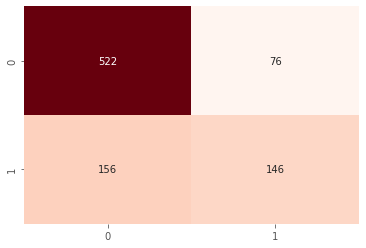

In [226]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
print('***ORIGINAL MODEL***')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

***OVERSAMPLED MODEL***


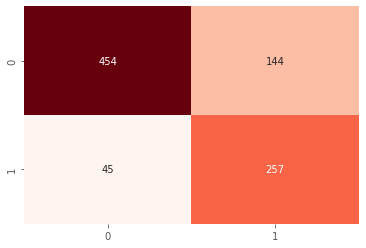

In [227]:
print('***OVERSAMPLED MODEL***')
sns.heatmap(confusion_matrix(y_test, y_pred_oversampled), annot=True, fmt='d', cmap="Reds", cbar=False);

***DOWNSAMPLED MODEL***


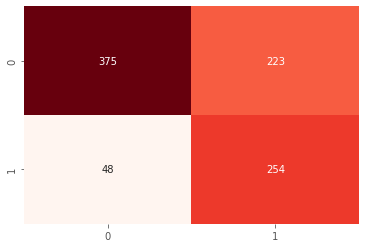

In [228]:
print('***DOWNSAMPLED MODEL***')
sns.heatmap(confusion_matrix(y_test, y_pred_downsampled), annot=True, fmt='d', cmap="Reds", cbar=False);

In [229]:
# Now we try to optimize the parameters for just the oversampled fit model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


classifier= RandomForestClassifier()
parameters = {'n_estimators' : [60, 70, 80],
    'criterion' : ['entropy', 'gini'],
             'max_depth' : [17,18,19], 
             'min_samples_split' : [2,3,4,5],
              'min_samples_leaf' : [2,3,4]
             }

gs_bestparameters = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)

In [230]:
gs_bestparameters.fit(X_oversampled_train,y_oversampled_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [17, 18, 19],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [60, 70, 80]},
             scoring='f1', verbose=10)

In [231]:
BestModel = gs_bestparameters.best_estimator_
y_pred = BestModel.predict(X_test)

y_pred_train = BestModel.predict(X_train)


In [232]:
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.9449743213499632
--
***RESULTS ON TEST SET***
f1_score:  0.7619047619047618


In [233]:
print('***RESULTS BEST MODEL***')
print(classification_report(y_test, y_pred))
print(" ")
print(" ")

***RESULTS BEST MODEL***
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       598
           1       0.68      0.87      0.76       302

    accuracy                           0.82       900
   macro avg       0.80      0.83      0.81       900
weighted avg       0.84      0.82      0.82       900

 
 


In [234]:
from sklearn.ensemble import RandomForestClassifier

# From changing the set of parameters for the gs, we have identified the parameters that give us the best result,
# By assigning the parameters to the rand_forest we can now display the ROC curve


rand_forest = RandomForestClassifier(n_estimators=80, criterion='entropy', max_depth=19, min_samples_split=5, min_samples_leaf=2)
rand_forest.fit(X_oversampled_train, y_oversampled_train)

y_pred = rand_forest.predict(X_test)

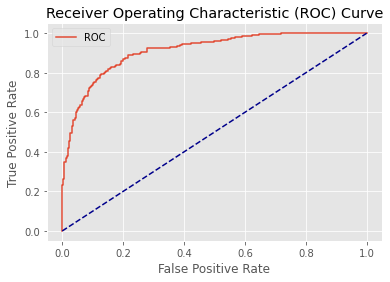

AUC: 0.91


In [235]:
# ROC curve

from sklearn import metrics

y_probs = rand_forest.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

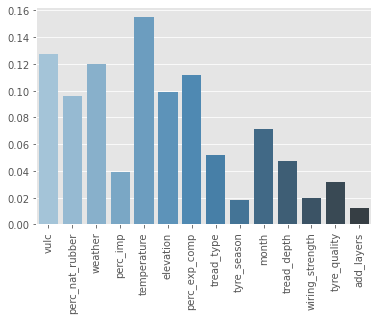

In [236]:
sns.barplot(x=X_train.columns, y=rand_forest.feature_importances_, palette="Blues_d")
plt.xticks(rotation=90)

# Adaboost

In [75]:
## from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

classifier= AdaBoostClassifier()
parameters = {'n_estimators' : [2000, 5000],
    'learning_rate' : [0.0001, 0.01, 0.1, 1, 10]}

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)
gs_oversampled = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)
gs_downsampled = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)


In [76]:
gs.fit(X_train,y_train)
gs_oversampled.fit(X_oversampled_train,y_oversampled_train)
gs_downsampled.fit(X_downsampled_train,y_downsampled_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.01, 0.1, 1, 10],
                         'n_estimators': [2000, 5000]},
             scoring='f1', verbose=10)

In [77]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.576444 using {'learning_rate': 0.01, 'n_estimators': 2000}
0.203035 (0.287135) with: {'learning_rate': 0.0001, 'n_estimators': 2000}
0.467636 (0.088173) with: {'learning_rate': 0.0001, 'n_estimators': 5000}
0.576444 (0.015281) with: {'learning_rate': 0.01, 'n_estimators': 2000}
0.570937 (0.013494) with: {'learning_rate': 0.01, 'n_estimators': 5000}
0.560230 (0.019323) with: {'learning_rate': 0.1, 'n_estimators': 2000}
0.550699 (0.012534) with: {'learning_rate': 0.1, 'n_estimators': 5000}
0.548400 (0.011710) with: {'learning_rate': 1, 'n_estimators': 2000}
0.532411 (0.013088) with: {'learning_rate': 1, 'n_estimators': 5000}
0.387452 (0.162948) with: {'learning_rate': 10, 'n_estimators': 2000}
0.387452 (0.162948) with: {'learning_rate': 10, 'n_estimators': 5000}


In [78]:
#TEST ON YOUR TEST SET 

# Original model
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

y_pred_train = best_model.predict(X_train)

# Oversampled model
best_model_oversampled = gs_oversampled.best_estimator_
y_pred_oversampled = best_model_oversampled.predict(X_test)

y_pred_oversampled_train = best_model_oversampled.predict(X_train)

# Downsampled model
best_model_downsampled = gs_downsampled.best_estimator_
y_pred_downsampled = best_model_downsampled.predict(X_test)

y_pred_downsampled_train = best_model_downsampled.predict(X_train)

In [79]:
#EVALUATE YOUR PREDICTION
from sklearn import metrics

print('***RESULTS ORIGINAL MODEL***')
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))
print(" ")
print(" ")

print('***RESULTS OVERSAMPLED MODEL***')
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_oversampled_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred_oversampled))
print(" ")
print(" ")

print('***RESULTS DOWNSAMPLED MODEL***')
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_downsampled_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred_downsampled))


***RESULTS ORIGINAL MODEL***
***RESULTS ON TRAIN SET***
f1_score:  0.6153846153846153
--
***RESULTS ON TEST SET***
f1_score:  0.5541284403669725
 
 
***RESULTS OVERSAMPLED MODEL***
***RESULTS ON TRAIN SET***
f1_score:  0.7983595352016405
--
***RESULTS ON TEST SET***
f1_score:  0.6743515850144093
 
 
***RESULTS DOWNSAMPLED MODEL***
***RESULTS ON TRAIN SET***
f1_score:  0.6218573627501283
--
***RESULTS ON TEST SET***
f1_score:  0.6


***ORIGINAL MODEL***


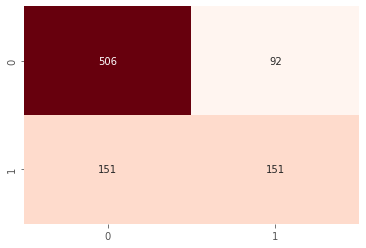

In [80]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
print('***ORIGINAL MODEL***')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

***OVERSAMPLED MODEL***


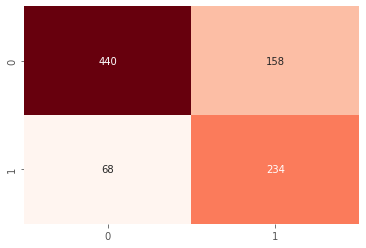

In [81]:
print('***OVERSAMPLED MODEL***')
sns.heatmap(confusion_matrix(y_test, y_pred_oversampled), annot=True, fmt='d', cmap="Reds", cbar=False);

***DOWNSAMPLED MODEL***


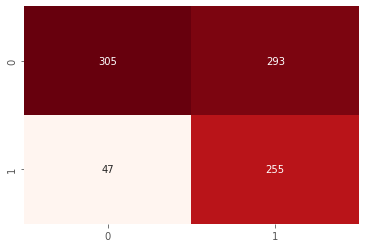

In [82]:
print('***DOWNSAMPLED MODEL***')
sns.heatmap(confusion_matrix(y_test, y_pred_downsampled), annot=True, fmt='d', cmap="Reds", cbar=False);

In [83]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       598
           1       0.62      0.50      0.55       302

    accuracy                           0.73       900
   macro avg       0.70      0.67      0.68       900
weighted avg       0.72      0.73      0.72       900



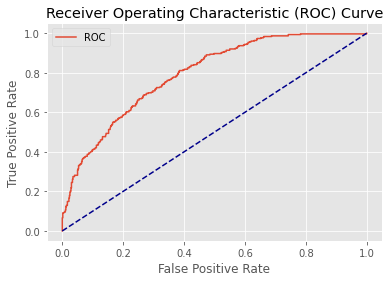

AUC: 0.79


In [84]:
adaboost = AdaBoostClassifier(n_estimators=1000, learning_rate=0.01)

adaboost.fit(X_train,y_train)

y_probs = adaboost.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

# Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

classifier = LogisticRegression()
parameters = {"C":[1e-2,1e-1,1],"penalty":['l2'] , "max_iter":[50000,10000]}

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'recall', verbose=50, n_jobs=-1, refit=True)
gs_oversampled = GridSearchCV(classifier, parameters, cv=3, scoring = 'recall', verbose=50, n_jobs=-1, refit=True)
gs_downsampled = GridSearchCV(classifier, parameters, cv=3, scoring = 'recall', verbose=50, n_jobs=-1, refit=True)

In [86]:
gs.fit(X_train,y_train)
gs_oversampled.fit(X_oversampled_train,y_oversampled_train)
gs_downsampled.fit(X_downsampled_train,y_downsampled_train)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'max_iter': [50000, 10000],
                         'penalty': ['l2']},
             scoring='recall', verbose=50)

In [87]:
#TEST ON YOUR TEST SET 

# Original model
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

y_pred_train = best_model.predict(X_train)

# Oversampled model
best_model_oversampled = gs_oversampled.best_estimator_
y_pred_oversampled = best_model_oversampled.predict(X_test)

y_pred_oversampled_train = best_model_oversampled.predict(X_train)

# Downsampled model
best_model_downsampled = gs_downsampled.best_estimator_
y_pred_downsampled = best_model_downsampled.predict(X_test)

y_pred_downsampled_train = best_model_downsampled.predict(X_train)

In [88]:
#EVALUATE YOUR PREDICTION
from sklearn import metrics

print('***RESULTS ORIGINAL MODEL***')
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))
print(" ")
print(" ")

print('***RESULTS OVERSAMPLED MODEL***')
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_oversampled_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred_oversampled))
print(" ")
print(" ")

print('***RESULTS DOWNSAMPLED MODEL***')
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_downsampled_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred_downsampled))


***RESULTS ORIGINAL MODEL***
***RESULTS ON TRAIN SET***
f1_score:  0.5622950819672131
--
***RESULTS ON TEST SET***
f1_score:  0.5371428571428571
 
 
***RESULTS OVERSAMPLED MODEL***
***RESULTS ON TRAIN SET***
f1_score:  0.6425061425061426
--
***RESULTS ON TEST SET***
f1_score:  0.6075949367088609
 
 
***RESULTS DOWNSAMPLED MODEL***
***RESULTS ON TRAIN SET***
f1_score:  0.6474908200734395
--
***RESULTS ON TEST SET***
f1_score:  0.6201117318435754


***ORIGINAL MODEL***


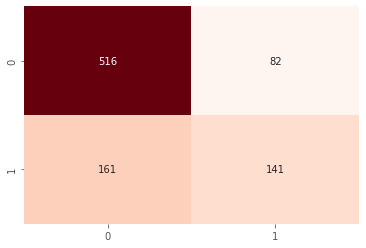

In [89]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
print('***ORIGINAL MODEL***')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

***OVERSAMPLED MODEL***


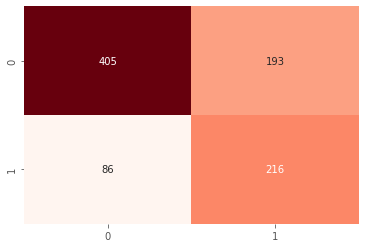

In [90]:
print('***OVERSAMPLED MODEL***')
sns.heatmap(confusion_matrix(y_test, y_pred_oversampled), annot=True, fmt='d', cmap="Reds", cbar=False);

***DOWNSAMPLED MODEL***


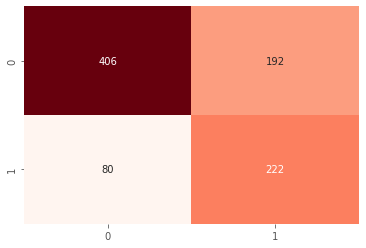

In [91]:
print('***DOWNSAMPLED MODEL***')
sns.heatmap(confusion_matrix(y_test, y_pred_downsampled), annot=True, fmt='d', cmap="Reds", cbar=False);

#SVM

In [153]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#{'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}

classifier = SVC()
parameters = {"kernel":['linear','rbf','polinomial'], "C":[0.1,1,10],"gamma":[1], "degree":[2,3,4]}

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1, refit=True)
gs_oversampled = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1, refit=True)
gs_downsampled = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1, refit=True)


In [154]:
gs.fit(X_train,y_train)
gs_oversampled.fit(X_oversampled_train,y_oversampled_train)
gs_downsampled.fit(X_downsampled_train,y_downsampled_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
27 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 173, in sk

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
27 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 173, in sk

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
27 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 173, in sk

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4], 'gamma': [1],
                         'kernel': ['linear', 'rbf', 'polinomial']},
             scoring='f1', verbose=50)

In [155]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs_oversampled.best_score_, gs_oversampled.best_params_))
means = gs_oversampled.cv_results_['mean_test_score']
stds = gs_oversampled.cv_results_['std_test_score']
params = gs_oversampled.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.774459 using {'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
0.729947 (0.014456) with: {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'linear'}
0.730426 (0.002987) with: {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
nan (nan) with: {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'polinomial'}
0.729947 (0.014456) with: {'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'linear'}
0.730426 (0.002987) with: {'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'rbf'}
nan (nan) with: {'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'polinomial'}
0.729947 (0.014456) with: {'C': 0.1, 'degree': 4, 'gamma': 1, 'kernel': 'linear'}
0.730426 (0.002987) with: {'C': 0.1, 'degree': 4, 'gamma': 1, 'kernel': 'rbf'}
nan (nan) with: {'C': 0.1, 'degree': 4, 'gamma': 1, 'kernel': 'polinomial'}
0.731690 (0.012268) with: {'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'linear'}
0.761810 (0.011935) with: {'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
nan (nan) with: {'C': 1, 'de

In [156]:
#TEST ON YOUR TEST SET 

# Original model
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

y_pred_train = best_model.predict(X_train)

# Oversampled model
best_model_oversampled = gs_oversampled.best_estimator_
y_pred_oversampled = best_model_oversampled.predict(X_test)
y_pred_oversampled2 = best_model_oversampled.predict(X_oversampled_test)

y_pred_oversampled_train = best_model_oversampled.predict(X_train)

# Downsampled model
best_model_downsampled = gs_downsampled.best_estimator_
y_pred_downsampled = best_model_downsampled.predict(X_test)

y_pred_downsampled_train = best_model_downsampled.predict(X_train)

In [157]:
#EVALUATE YOUR PREDICTION
from sklearn import metrics

print('***RESULTS ORIGINAL MODEL***')
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))
print(" ")
print(" ")

print('***RESULTS OVERSAMPLED MODEL***')
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_oversampled_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred_oversampled))
print("f1_score_oversampled: ", metrics.f1_score(y_oversampled_test, y_pred_oversampled2))
print(" ")
print(" ")

print('***RESULTS DOWNSAMPLED MODEL***')
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_downsampled_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred_downsampled))


***RESULTS ORIGINAL MODEL***
***RESULTS ON TRAIN SET***
f1_score:  0.5590277777777777
--
***RESULTS ON TEST SET***
f1_score:  0.5271629778672032
 
 
***RESULTS OVERSAMPLED MODEL***
***RESULTS ON TRAIN SET***
f1_score:  0.9278663629460897
--
***RESULTS ON TEST SET***
f1_score:  0.7485207100591715
f1_score_oversampled:  0.8164609053497942
 
 
***RESULTS DOWNSAMPLED MODEL***
***RESULTS ON TRAIN SET***
f1_score:  0.6558516801853997
--
***RESULTS ON TEST SET***
f1_score:  0.6295793758480326


In [158]:
from sklearn.metrics import classification_report


print('***RESULTS ORIGINAL MODEL***')
print(classification_report(y_test, y_pred))
print(" ")
print(" ")

print('***RESULTS OVERSAMPLED MODEL***')
print(classification_report(y_test, y_pred_oversampled))
print(" ")
print(" ")

print('***RESULTS DOWNSAMPLED MODEL***')
print(classification_report(y_test, y_pred_downsampled))
print(" ")
print(" ")

***RESULTS ORIGINAL MODEL***
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       598
           1       0.67      0.43      0.53       302

    accuracy                           0.74       900
   macro avg       0.71      0.66      0.67       900
weighted avg       0.73      0.74      0.72       900

 
 
***RESULTS OVERSAMPLED MODEL***
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       598
           1       0.68      0.84      0.75       302

    accuracy                           0.81       900
   macro avg       0.79      0.82      0.80       900
weighted avg       0.83      0.81      0.82       900

 
 
***RESULTS DOWNSAMPLED MODEL***
              precision    recall  f1-score   support

           0       0.85      0.66      0.74       598
           1       0.53      0.77      0.63       302

    accuracy                           0.70       900
   macro avg       0.69    

***ORIGINAL MODEL***


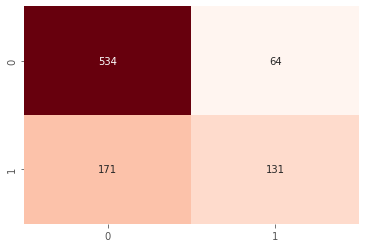

In [159]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
print('***ORIGINAL MODEL***')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

***OVERSAMPLED MODEL***


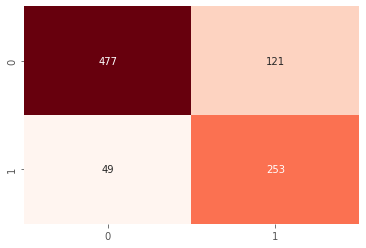

In [160]:
print('***OVERSAMPLED MODEL***')
sns.heatmap(confusion_matrix(y_test, y_pred_oversampled), annot=True, fmt='d', cmap="Reds", cbar=False);

***DOWNSAMPLED MODEL***


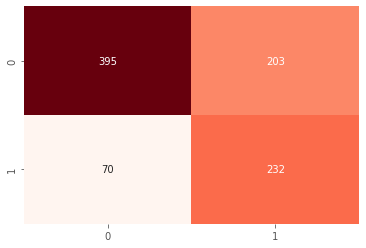

In [161]:
print('***DOWNSAMPLED MODEL***')
sns.heatmap(confusion_matrix(y_test, y_pred_downsampled), annot=True, fmt='d', cmap="Reds", cbar=False);

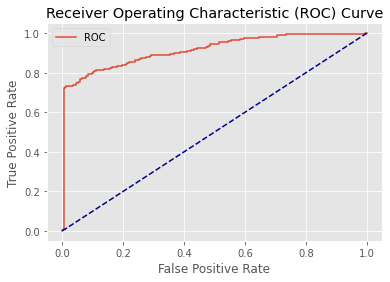

AUC: 0.92


In [162]:
from sklearn import metrics
#{'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
model = SVC(C=10, gamma= 1, kernel='rbf', degree = 2,probability=True)

model.fit(X_oversampled_train, y_oversampled_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

# Multi-layer Perceptron Classifier

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(20,5),(6,2), (25)],  "max_iter": [1000, 5000, 100000], "alpha": [0.001, 0.01]}

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1, refit=True)
gs_oversampled = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1, refit=True)
gs_downsampled = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1, refit=True)



In [103]:
gs.fit(X_train,y_train)
gs_oversampled.fit(X_oversampled_train,y_oversampled_train)
gs_downsampled.fit(X_downsampled_train,y_downsampled_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01],
                         'hidden_layer_sizes': [(20, 5), (6, 2), 25],
                         'max_iter': [1000, 5000, 100000]},
             scoring='f1', verbose=50)

In [104]:
#TEST ON YOUR TEST SET 

# Original model
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

y_pred_train = best_model.predict(X_train)

# Oversampled model
best_model_oversampled = gs_oversampled.best_estimator_
y_pred_oversampled = best_model_oversampled.predict(X_test)

y_pred_oversampled_train = best_model_oversampled.predict(X_train)

# Downsampled model
best_model_downsampled = gs_downsampled.best_estimator_
y_pred_downsampled = best_model_downsampled.predict(X_test)

y_pred_downsampled_train = best_model_downsampled.predict(X_train)

In [105]:
#EVALUATE YOUR PREDICTION
from sklearn import metrics

print('***RESULTS ORIGINAL MODEL***')
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))
print(" ")
print(" ")

print('***RESULTS OVERSAMPLED MODEL***')
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_oversampled_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred_oversampled))
print(" ")
print(" ")

print('***RESULTS DOWNSAMPLED MODEL***')
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_downsampled_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred_downsampled))

***RESULTS ORIGINAL MODEL***
***RESULTS ON TRAIN SET***
f1_score:  0.6558641975308642
--
***RESULTS ON TEST SET***
f1_score:  0.5418181818181819
 
 
***RESULTS OVERSAMPLED MODEL***
***RESULTS ON TRAIN SET***
f1_score:  0.6891891891891891
--
***RESULTS ON TEST SET***
f1_score:  0.6199158485273492
 
 
***RESULTS DOWNSAMPLED MODEL***
***RESULTS ON TRAIN SET***
f1_score:  0.6562318840579711
--
***RESULTS ON TEST SET***
f1_score:  0.6367346938775511


In [106]:
from sklearn.metrics import classification_report


print('***RESULTS ORIGINAL MODEL***')
print(classification_report(y_test, y_pred))
print(" ")
print(" ")

print('***RESULTS OVERSAMPLED MODEL***')
print(classification_report(y_test, y_pred_oversampled))
print(" ")
print(" ")

print('***RESULTS DOWNSAMPLED MODEL***')
print(classification_report(y_test, y_pred_downsampled))
print(" ")
print(" ")

***RESULTS ORIGINAL MODEL***
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       598
           1       0.60      0.49      0.54       302

    accuracy                           0.72       900
   macro avg       0.68      0.66      0.67       900
weighted avg       0.71      0.72      0.71       900

 
 
***RESULTS OVERSAMPLED MODEL***
              precision    recall  f1-score   support

           0       0.83      0.68      0.75       598
           1       0.54      0.73      0.62       302

    accuracy                           0.70       900
   macro avg       0.69      0.71      0.69       900
weighted avg       0.73      0.70      0.71       900

 
 
***RESULTS DOWNSAMPLED MODEL***
              precision    recall  f1-score   support

           0       0.85      0.67      0.75       598
           1       0.54      0.77      0.64       302

    accuracy                           0.70       900
   macro avg       0.70    

***ORIGINAL MODEL***


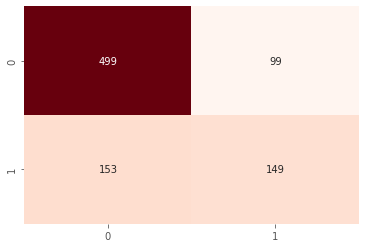

In [107]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
print('***ORIGINAL MODEL***')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

***OVERSAMPLED MODEL***


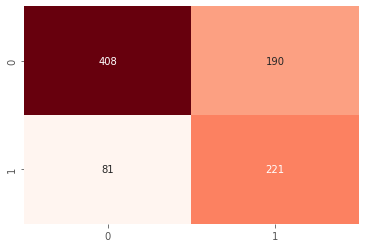

In [108]:
print('***OVERSAMPLED MODEL***')
sns.heatmap(confusion_matrix(y_test, y_pred_oversampled), annot=True, fmt='d', cmap="Reds", cbar=False);

***DOWNSAMPLED MODEL***


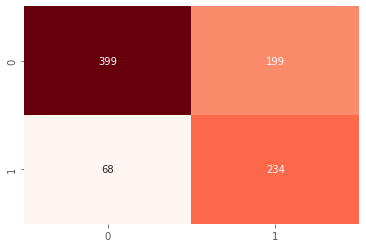

In [109]:
print('***DOWNSAMPLED MODEL***')
sns.heatmap(confusion_matrix(y_test, y_pred_downsampled), annot=True, fmt='d', cmap="Reds", cbar=False);

# Naive Bayes

In [110]:
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()
model_downsampled = GaussianNB()
model_oversampled = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

model_oversampled.fit(X_oversampled_train, y_oversampled_train)
y_pred_oversampled=model_oversampled.predict(X_test)
y_pred_oversampled_train=model_oversampled.predict(X_train)

model_downsampled.fit(X_downsampled_train, y_downsampled_train)
y_pred_downsampled=model_downsampled.predict(X_test)
y_pred_downsampled_train=model_downsampled.predict(X_train)


In [111]:
#EVALUATE YOUR PREDICTION
from sklearn import metrics

print('***RESULTS ORIGINAL MODEL***')
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))
print(" ")
print(" ")

print('***RESULTS OVERSAMPLED MODEL***')
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_oversampled_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred_oversampled))
print(" ")
print(" ")

print('***RESULTS DOWNSAMPLED MODEL***')
print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_downsampled_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred_downsampled))


***RESULTS ORIGINAL MODEL***
***RESULTS ON TRAIN SET***
f1_score:  0.5903698534542917
--
***RESULTS ON TEST SET***
f1_score:  0.5601317957166392
 
 
***RESULTS OVERSAMPLED MODEL***
***RESULTS ON TRAIN SET***
f1_score:  0.5906610066707095
--
***RESULTS ON TEST SET***
f1_score:  0.5706214689265536
 
 
***RESULTS DOWNSAMPLED MODEL***
***RESULTS ON TRAIN SET***
f1_score:  0.5994134897360704
--
***RESULTS ON TEST SET***
f1_score:  0.5718157181571816


# PREDICTION

In [216]:
# import the libraries

import numpy as np
import pandas as pd

# import the dataset

prediction = pd.read_csv("tyres_prediction.csv", sep = ",")
prediction

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers
0,17.180,30,1,0.21,0.00,-9.24,0,1,460.5,4,3,0,5.54,74,1
1,17.744,24,1,0.16,0.01,-9.12,0,1,278.5,8,0,1,5.01,79,1
2,16.930,34,0,0.27,0.01,3.64,2,0,733.5,11,2,0,6.41,94,1
3,22.428,34,1,0.03,0.00,0.56,3,0,235.5,9,3,0,5.95,93,1
4,16.818,29,1,0.06,0.00,-0.96,3,0,461.0,9,0,1,5.97,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7979,20.060,31,1,0.29,0.01,0.40,4,1,361.5,6,2,1,5.89,85,1
7980,17.718,21,1,0.16,0.01,-8.68,0,1,409.5,8,0,1,5.56,54,1
7981,17.908,23,1,0.16,0.01,-6.92,0,1,266.0,8,0,1,5.20,62,1
7982,17.916,28,1,0.16,0.01,-7.92,0,1,301.0,8,0,1,5.76,90,1


In [219]:
prediction.isna().any()

vulc               False
perc_nat_rubber    False
wiring_strength    False
weather            False
perc_imp           False
temperature        False
tread_type         False
tyre_season        False
elevation          False
month              False
tread_depth        False
tyre_quality       False
perc_exp_comp      False
diameter           False
add_layers         False
dtype: bool

In [237]:
# lets drop the diamater
prediction = prediction.drop('diameter', axis=1)
prediction

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,add_layers
0,17.180,30,1,0.21,0.00,-9.24,0,1,460.5,4,3,0,5.54,1
1,17.744,24,1,0.16,0.01,-9.12,0,1,278.5,8,0,1,5.01,1
2,16.930,34,0,0.27,0.01,3.64,2,0,733.5,11,2,0,6.41,1
3,22.428,34,1,0.03,0.00,0.56,3,0,235.5,9,3,0,5.95,1
4,16.818,29,1,0.06,0.00,-0.96,3,0,461.0,9,0,1,5.97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7979,20.060,31,1,0.29,0.01,0.40,4,1,361.5,6,2,1,5.89,1
7980,17.718,21,1,0.16,0.01,-8.68,0,1,409.5,8,0,1,5.56,1
7981,17.908,23,1,0.16,0.01,-6.92,0,1,266.0,8,0,1,5.20,1
7982,17.916,28,1,0.16,0.01,-7.92,0,1,301.0,8,0,1,5.76,1


In [238]:
# prediction 
# rand_forest is our selected best model. See random forest section for fiting

target = rand_forest.predict(prediction)
target

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([1, 0, 1, ..., 0, 0, 0])

In [240]:
target.shape

(7984,)

In [243]:
pd.DataFrame(target).to_csv("10528210_Adami_Peracchia_Paolo_Francesco.csv", header = ["target"], index = None)

In [244]:
pd.DataFrame(target).to_csv("10682675_Spaziani_Valerio.csv", header = ["target"], index = None)